In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "AB_NYC_2019.csv" 
airbnb_data = pd.read_csv(file_path)

print("Dataset Shape:", airbnb_data.shape)
print("\nColumn Data Types:")
print(airbnb_data.dtypes)

print("\nMissing Values:")
print(airbnb_data.isnull().sum())


Dataset Shape: (48895, 16)

Column Data Types:
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Missing Values:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude  

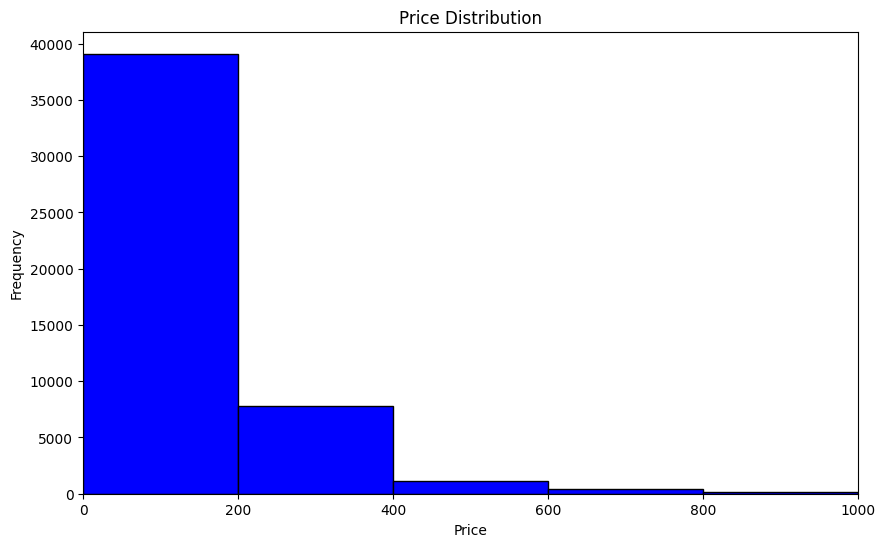

In [2]:
#price distribution
plt.figure(figsize=(10, 6))
plt.hist(airbnb_data['price'], bins=50, color='blue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, 1000) 
plt.show()

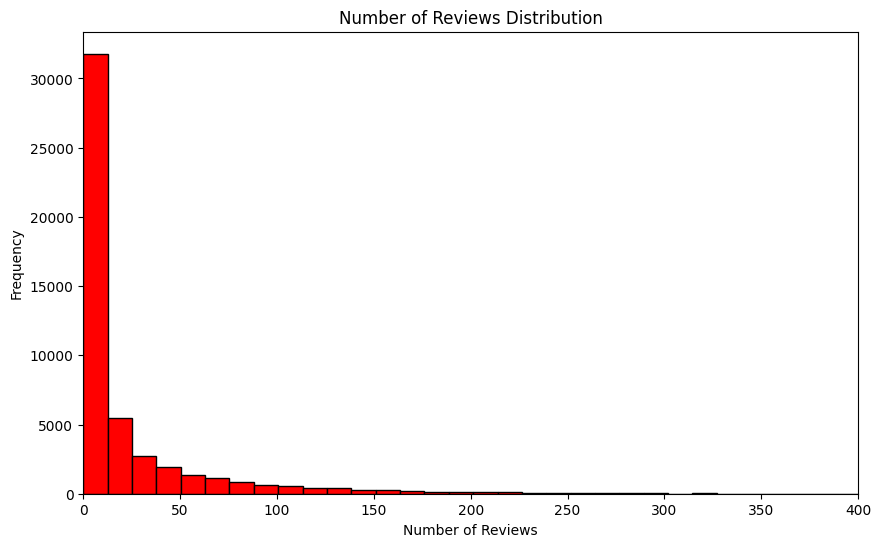

In [3]:
#no. of reviews
plt.figure(figsize=(10, 6))
plt.hist(airbnb_data['number_of_reviews'], bins=50, color='red', edgecolor='black')
plt.title('Number of Reviews Distribution')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.xlim(0, 400)
plt.show()


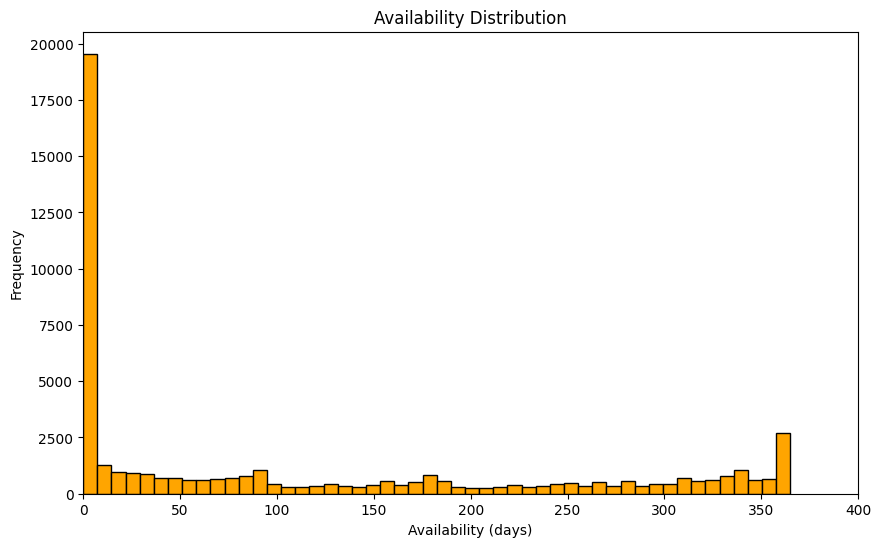

In [4]:
#availability distribution
plt.figure(figsize=(10, 6))
plt.hist(airbnb_data['availability_365'], bins=50, color='orange', edgecolor='black')
plt.title('Availability Distribution')
plt.xlabel('Availability (days)')
plt.ylabel('Frequency')
plt.xlim(0, 400)
plt.show()


In [10]:
airbnb_data['reviews_per_month'] = airbnb_data['reviews_per_month'].fillna(0)
airbnb_data['last_review'] = airbnb_data['last_review'].fillna(0)
airbnb_data = airbnb_data.dropna(subset=['name', 'host_name'])
print(airbnb_data.isnull().sum())

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [11]:

duplicates = airbnb_data.duplicated().sum()
print(f"Number of duplicated rows: {duplicates}")
if duplicates > 0:
    airbnb_data = airbnb_data.drop_duplicates()


Number of duplicated rows: 0


In [12]:

print("Neighbourhood Distribution:")
print(airbnb_data['neighbourhood'].value_counts())


print("\nRoom Type Distribution:")
print(airbnb_data['room_type'].value_counts())


Neighbourhood Distribution:
neighbourhood
Williamsburg          3917
Bedford-Stuyvesant    3713
Harlem                2655
Bushwick              2462
Upper West Side       1969
                      ... 
Richmondtown             1
Fort Wadsworth           1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

Room Type Distribution:
room_type
Entire home/apt    25393
Private room       22306
Shared room         1159
Name: count, dtype: int64


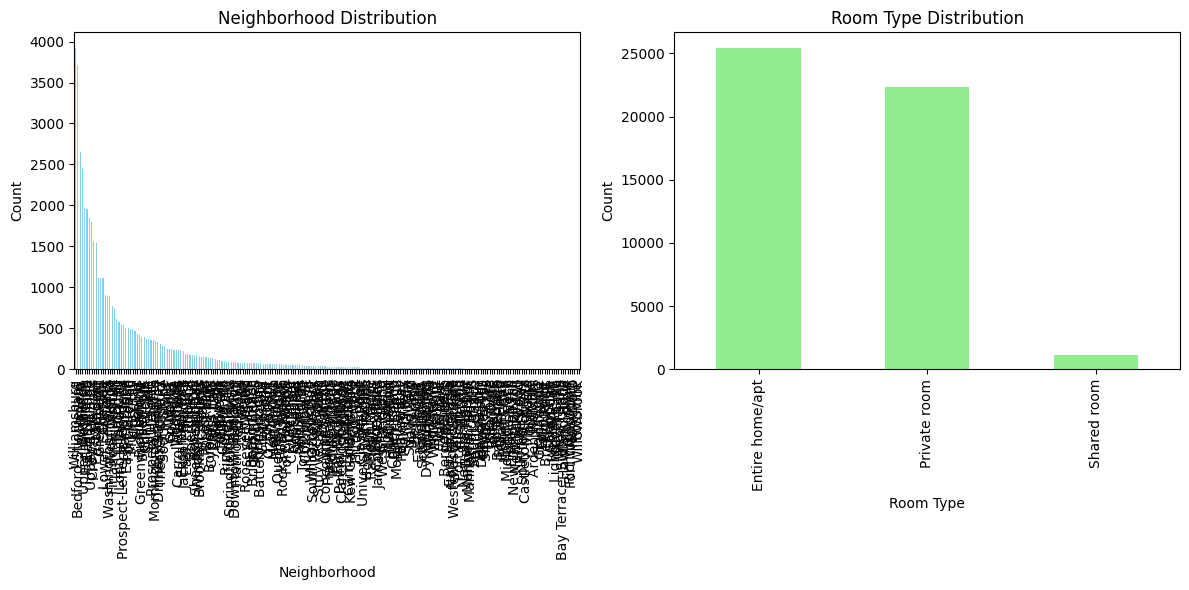

In [14]:

plt.figure(figsize=(12, 6))

# Neighborhood distribution
plt.subplot(1, 2, 1)
airbnb_data['neighbourhood'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Neighborhood Distribution')
plt.xlabel('Neighborhood')
plt.ylabel('Count')

# Room type distribution
plt.subplot(1, 2, 2)
airbnb_data['room_type'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()



In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
airbnb_data['room_type_encoded'] = label_encoder.fit_transform(airbnb_data['room_type'])

# One-Hot Encoding for 'neighbourhood_group' column
airbnb_data = pd.get_dummies(airbnb_data, columns=['neighbourhood_group'], drop_first=True)

airbnb_data.head()


,id,name,host_id,host_name,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,2539,Clean & quiet apt home by the park,2787,John,40.64749,-73.97237,Private room,149,1,9,...,False,False,False,False,False,False,True,False,False,False
1,2595,Skylit Midtown Castle,2845,Jennifer,40.75362,-73.98377,Entire home/apt,225,1,45,...,False,False,False,False,False,False,False,True,False,False
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,40.80902,-73.94190,Private room,150,3,0,...,False,False,False,False,False,False,False,True,False,False
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,40.68514,-73.95976,Entire home/apt,89,1,270,...,False,False,False,False,False,False,True,False,False,False
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,40.79851,-73.94399,Entire home/apt,80,10,9,...,False,False,False,False,False,False,False,True,False,False


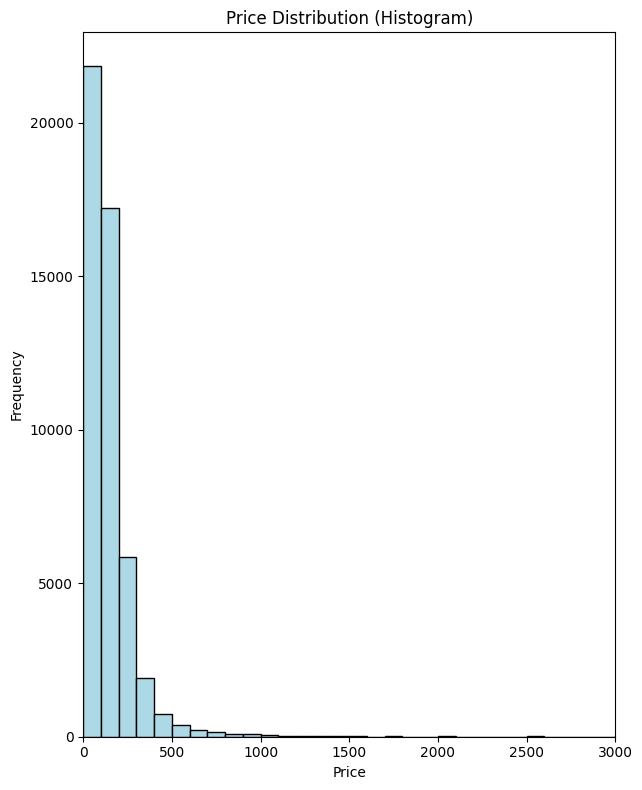

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Histogram
plt.subplot(1, 2, 1)
airbnb_data['price'].plot(kind='hist', bins=100, color='lightblue', edgecolor='black')
plt.title('Price Distribution (Histogram)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, 3000) 

plt.tight_layout()
plt.show()


2971

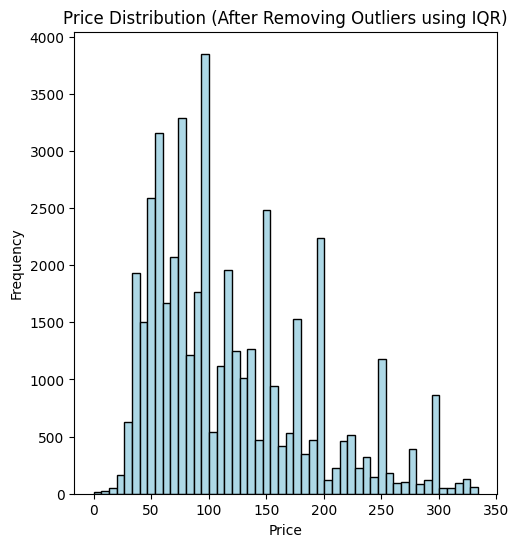

In [32]:
Q1 = airbnb_data['price'].quantile(0.25)
Q3 = airbnb_data['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_IQR = airbnb_data[(airbnb_data['price'] < lower_bound) | (airbnb_data['price'] > upper_bound)]

airbnb_data_filtered_IQR = airbnb_data[(airbnb_data['price'] >= lower_bound) & (airbnb_data['price'] <= upper_bound)]
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
airbnb_data_filtered_IQR['price'].plot(kind='hist', bins=50, color='lightblue', edgecolor='black')
plt.title('Price Distribution (After Removing Outliers using IQR)')
plt.xlabel('Price')
plt.ylabel('Frequency')

len(outliers_IQR)


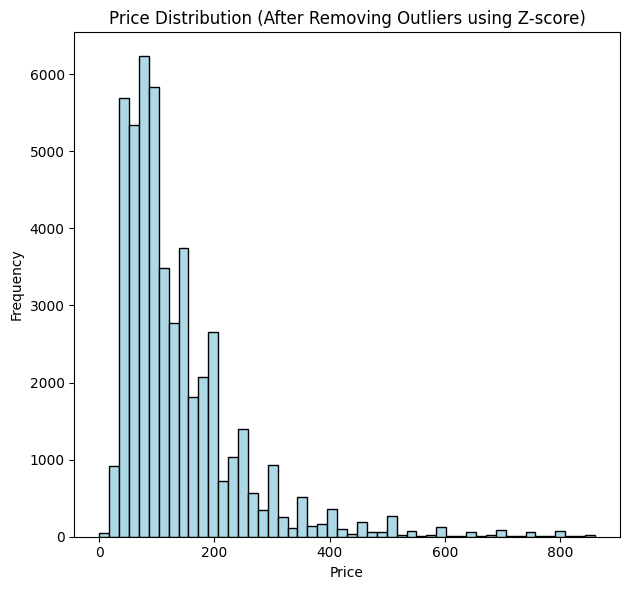

388

In [33]:
from scipy import stats
z_scores = stats.zscore(airbnb_data['price'])
outliers_zscore = airbnb_data[abs(z_scores) > 3]
airbnb_data_filtered_zscore = airbnb_data[abs(z_scores) <= 3]
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
airbnb_data_filtered_zscore['price'].plot(kind='hist', bins=50, color='lightblue', edgecolor='black')
plt.title('Price Distribution (After Removing Outliers using Z-score)')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

len(outliers_zscore)


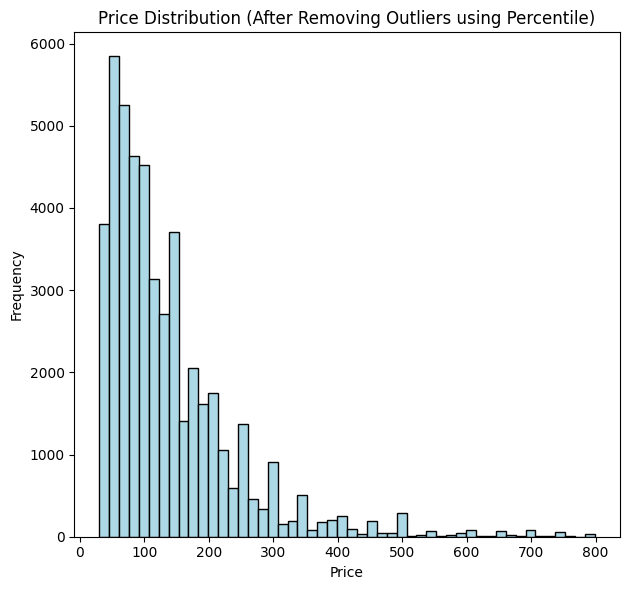

877

In [34]:
lower_percentile = airbnb_data['price'].quantile(0.01)
upper_percentile = airbnb_data['price'].quantile(0.99)

outliers_percentile = airbnb_data[(airbnb_data['price'] < lower_percentile) | (airbnb_data['price'] > upper_percentile)]

airbnb_data_filtered_percentile = airbnb_data[(airbnb_data['price'] >= lower_percentile) & (airbnb_data['price'] <= upper_percentile)]
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
airbnb_data_filtered_percentile['price'].plot(kind='hist', bins=50, color='lightblue', edgecolor='black')
plt.title('Price Distribution (After Removing Outliers using Percentile)')
plt.xlabel('Price')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()
len(outliers_percentile)


In [39]:
airbnb_data['last_review'] = pd.to_datetime(airbnb_data['last_review'])

airbnb_data['last_review_year'] = airbnb_data['last_review'].dt.year

airbnb_data[['last_review', 'last_review_year']]


,last_review,last_review_year
0,2018-10-19,2018.0
1,2019-05-21,2019.0
2,NaT,NaN
3,2019-07-05,2019.0
4,2018-11-19,2018.0
...,...,...
48890,NaT,NaN
48891,NaT,NaN
48892,NaT,NaN
48893,NaT,NaN


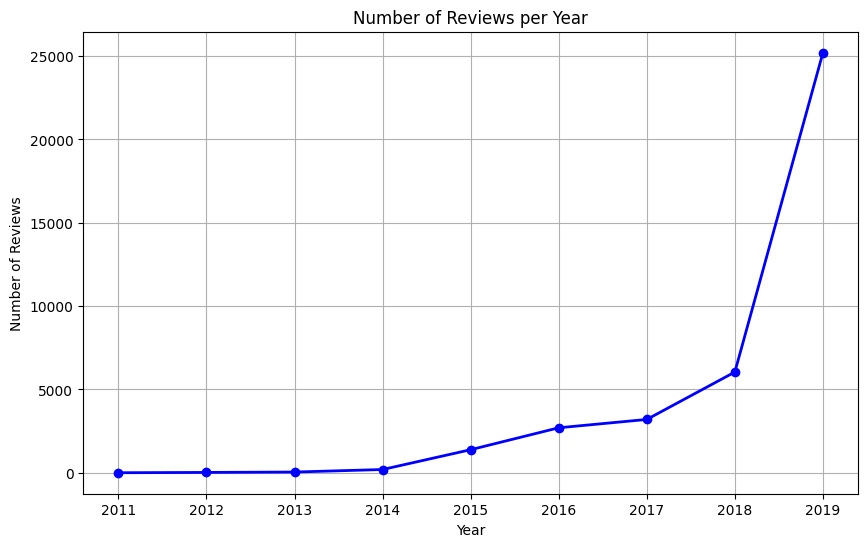

In [40]:
reviews_per_year = airbnb_data['last_review_year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
reviews_per_year.plot(kind='line', marker='o', color='b', linestyle='-', linewidth=2)
plt.title('Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()


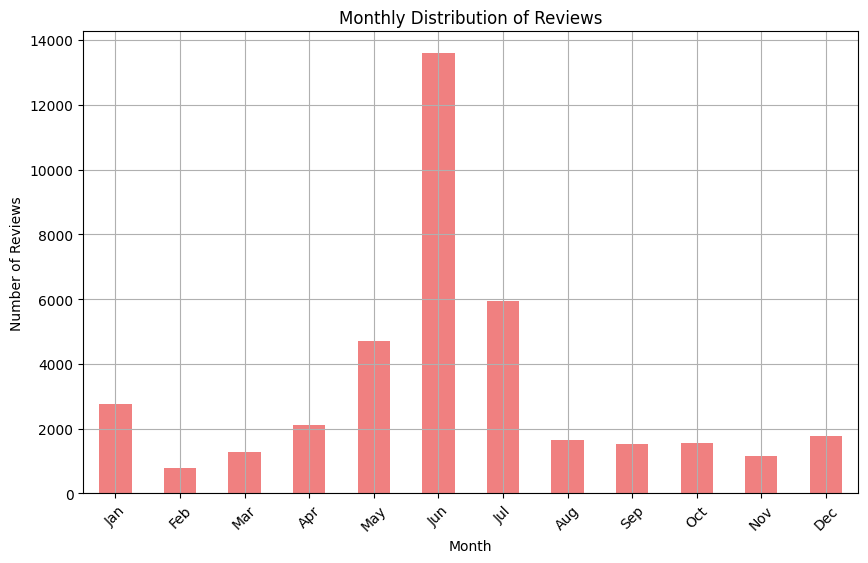

In [41]:
airbnb_data['last_review_month'] = airbnb_data['last_review'].dt.month

reviews_per_month = airbnb_data.groupby('last_review_month').size()

plt.figure(figsize=(10, 6))
reviews_per_month.plot(kind='bar', color='lightcoral')
plt.title('Monthly Distribution of Reviews')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(True)
plt.show()
